# Cryptocurrency Cluster

In [21]:
#Inport Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Loading data
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df_crypto = df_crypto.loc[df_crypto['IsTrading'] == True]

In [4]:
df_crypto = df_crypto.drop(columns=["IsTrading"])
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
for column in df_crypto.columns:
    print(f"Column {column} has {df_crypto[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [6]:
df_crypto1 = df_crypto.dropna()
df_crypto1

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
for column in df_crypto1.columns:
    print(f"Column {column} has {df_crypto1[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [8]:
df_crypto1 = df_crypto1.loc[df_crypto1['TotalCoinsMined'] != 0]
df_crypto1

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
df_crypto1 = df_crypto1.drop(columns = ["CoinName","Unnamed: 0"])
df_crypto1

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [10]:
df_dummies_crypto = pd.get_dummies(df_crypto1, columns=['Algorithm', 'ProofType'])
df_dummies_crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies_crypto)
scaled_data

array([[-0.11674788, -0.15286468, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       ...,
       [-0.09523411, -0.13215444, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11658774, -0.15255408, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11674507, -0.15284989, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ]])

In [33]:
# Add missing dummy variables to testing set
for col in df_dummies_crypto.columns:
    if col not in df_dummies_crypto.columns:
        df_dummies_crypto[col]=0

In [34]:
new_df_crypto = pd.DataFrame(scaled_data, columns=df_dummies_crypto.columns[0:])
new_df_crypto

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.116748,-0.152865,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,...,1.424222,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
1,-0.093589,-0.144996,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,...,1.424222,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
2,0.525872,4.493764,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,...,1.424222,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
3,-0.116354,-0.152554,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,...,-0.702138,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
4,-0.114384,-0.152865,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,...,-0.702138,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,-0.072852,-0.123283,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,...,-0.702138,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
529,-0.116420,-0.149167,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,...,1.424222,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
530,-0.095234,-0.132154,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,...,-0.702138,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355
531,-0.116588,-0.152554,-0.043355,-0.043355,-0.043355,-0.061372,-0.075235,-0.043355,-0.061372,-0.061372,...,-0.702138,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355,-0.043355


# Dimensionality Reduction

In [62]:
# Initialize PCA model for 3 principal components
pca = PCA(n_components=.90)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(scaled_data)

In [63]:
# Transform PCA data to a DataFrame
df_crypto_pca = pca.fit_transform(scaled_data)
df_crypto_pca

array([[-3.33758591e-01,  1.01033456e+00, -6.45813100e-01, ...,
        -5.06040415e-16,  3.17985721e-15, -8.94364083e-16],
       [-3.17078307e-01,  1.01046673e+00, -6.46245153e-01, ...,
        -7.31672051e-16,  2.87310824e-15, -1.71359633e-15],
       [ 2.30874144e+00,  1.63618216e+00, -7.41286519e-01, ...,
        -3.63122170e-14, -5.92231840e-14,  1.51105010e-14],
       ...,
       [ 3.25544490e-01, -2.30484323e+00,  4.73020601e-01, ...,
        -2.92407854e-14,  2.28689764e-14,  2.82924129e-14],
       [-1.48615876e-01, -2.04201101e+00,  4.59154481e-01, ...,
         3.42748032e-15,  3.90533637e-16, -1.26148663e-15],
       [-2.89193559e-01,  8.11644902e-01, -3.06778334e-01, ...,
         3.13903721e-15, -2.82305642e-15, -1.89885498e-15]])

In [64]:
df_crypto_pca.shape

(533, 75)

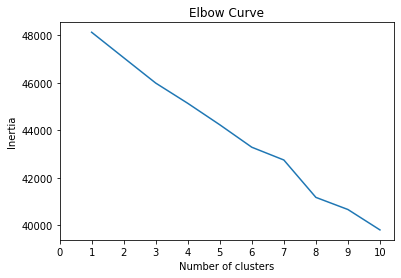

In [65]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)
    
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()    

In [72]:
# Run t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=20,learning_rate=100)
tsne_features = tsne.fit_transform(df_crypto_pca)

In [73]:
# Check that dimensions have been reduced to two
tsne_features.shape

(533, 2)

In [75]:
transformed_features  = tsne.fit_transform(tsne_features)
transformed_features

array([[  8.19154  , -14.098105 ],
       [ 21.98952  , -17.01038  ],
       [ 35.979244 , -19.590376 ],
       ...,
       [ 38.64695  ,   8.503488 ],
       [  1.7668059,  30.535374 ],
       [-12.753443 ,  -2.9041388]], dtype=float32)

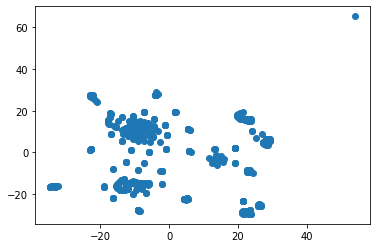

In [76]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [78]:
# # Results colored by target value
# plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
# plt.show()

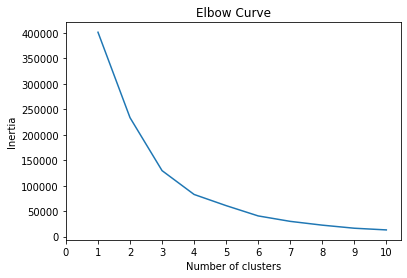

In [77]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)
    
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()